In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import glob
import os.path as osp
from PIL import Image
from PIL import ImageEnhance
import matplotlib.cm as cm

import torchvision.datasets as dset
import torchvision.transforms as T
import chest_xray_code.data.xrays as preprocess_dataset
import chest_xray_code.data.raw_reports as utils
import os
import torch.nn.functional as F
from models.NewConvModel import NewConvNet 
from models.TestConvNet import TestConvNet
from loaders.XrayLoader import XrayLoader
from loaders.BloodCellLoader import BloodCellLoader
from loaders.BloodCellLoader256 import BloodCellLoader256
from loaders.MuseumLoader import MuseumLoader

import numpy as np

In [2]:
class ConvNet16(nn.Module):
    def __init__(self,channels,size):
        super().__init__()

        self.conv_1_compress = nn.Conv2d(channels, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.relu_1_compress = nn.ReLU()
        
        self.conv_2_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_2_compress = nn.BatchNorm2d(size)
        self.relu_2_compress = nn.ReLU()
        
        self.conv_3_compress = nn.Conv2d(size, size, kernel_size=3,stride=2,padding=1,bias=True)
        self.batchnorm_3_compress = nn.BatchNorm2d(size)
        self.relu_3_compress = nn.ReLU()
        
        self.conv_4_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_4_compress = nn.BatchNorm2d(size)
        self.relu_4_compress = nn.ReLU()
        
        self.conv_5_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_5_compress = nn.BatchNorm2d(size)
        self.relu_5_compress = nn.ReLU()
        
        self.conv_6_compress = nn.Conv2d(size, size, kernel_size=3,stride=2,padding=1,bias=True)
        self.batchnorm_6_compress = nn.BatchNorm2d(size)
        self.relu_6_compress = nn.ReLU()

        self.conv_downsize_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_downsize_compress = nn.BatchNorm2d(size)
        self.relu_downsize_compress = nn.ReLU()
        
        self.conv_7_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_7_compress = nn.BatchNorm2d(size)
        self.relu_7_compress = nn.ReLU()
        
        self.conv_8_compress = nn.Conv2d(size, size, kernel_size=3,stride=2,padding=1,bias=True)
        self.batchnorm_8_compress = nn.BatchNorm2d(size)
        self.relu_8_compress = nn.ReLU()
        
        self.conv_9_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_9_compress = nn.BatchNorm2d(size)
        self.relu_9_compress = nn.ReLU()
        
        self.conv_10_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_10_compress = nn.BatchNorm2d(size)
        self.relu_10_compress = nn.ReLU()
        
        self.conv_11_compress = nn.Conv2d(size, size, kernel_size=3,stride=2,padding=1,bias=True)
        self.batchnorm_11_compress = nn.BatchNorm2d(size)
        self.relu_11_compress = nn.ReLU()
        
        self.conv_12_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_12_compress = nn.BatchNorm2d(size)
        self.relu_12_compress = nn.ReLU()
        
        self.conv_13_compress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_13_compress = nn.BatchNorm2d(size)
        self.relu_13_compress = nn.ReLU()
        
        
        self.conv_compress_final = nn.Conv2d(size, channels, kernel_size=3,stride=1,padding=1,bias=True)
        
        self.upscaling = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        self.conv_1_decompress = nn.Conv2d(channels, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.relu_1_decompress = nn.ReLU()
        
        self.conv_2_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_2_decompress = nn.BatchNorm2d(size)
        self.relu_2_decompress = nn.ReLU()
        
        self.conv_3_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_3_decompress = nn.BatchNorm2d(size)
        self.relu_3_decompress = nn.ReLU()
        
        self.conv_4_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_4_decompress = nn.BatchNorm2d(size)
        self.relu_4_decompress = nn.ReLU()
        
        self.upscaling2 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        self.conv_5_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_5_decompress = nn.BatchNorm2d(size)
        self.relu_5_decompress = nn.ReLU()
        
        self.conv_6_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_6_decompress = nn.BatchNorm2d(size)
        self.relu_6_decompress = nn.ReLU()
        
        self.conv_7_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_7_decompress = nn.BatchNorm2d(size)
        self.relu_7_decompress = nn.ReLU()
        
        self.conv_8_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_8_decompress = nn.BatchNorm2d(size)
        self.relu_8_decompress = nn.ReLU()
        
        self.upscaling3 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        self.conv_9_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_9_decompress = nn.BatchNorm2d(size)
        self.relu_9_decompress = nn.ReLU()
        
        self.conv_10_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_10_decompress = nn.BatchNorm2d(size)
        self.relu_10_decompress = nn.ReLU()
        
        self.conv_11_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_11_decompress = nn.BatchNorm2d(size)
        self.relu_11_decompress = nn.ReLU()
        
        self.conv_12_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_12_decompress = nn.BatchNorm2d(size)
        self.relu_12_decompress = nn.ReLU()
        
        self.upscaling4 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        self.conv_13_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_13_decompress = nn.BatchNorm2d(size)
        self.relu_13_decompress = nn.ReLU()
        
        self.conv_14_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_14_decompress = nn.BatchNorm2d(size)
        self.relu_14_decompress = nn.ReLU()
        
        self.conv_15_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_15_decompress = nn.BatchNorm2d(size)
        self.relu_15_decompress = nn.ReLU()
        
        self.conv_16_decompress = nn.Conv2d(size, size, kernel_size=3,stride=1,padding=1,bias=True)
        self.batchnorm_16_decompress = nn.BatchNorm2d(size)
        self.relu_16_decompress = nn.ReLU()
        
        self.conv_17_decompress = nn.Conv2d(size, 3, kernel_size=3,stride=1,padding=1,bias=True)
        

    def forward(self, x):
        scores = None
        model = torch.nn.Sequential( 
            
            self.conv_1_compress,
            self.relu_1_compress,
        
            self.conv_2_compress,
            self.batchnorm_2_compress,
            self.relu_2_compress,
            
            self.conv_3_compress,
            self.batchnorm_3_compress,
            self.relu_3_compress,
            
            self.conv_4_compress,
            self.batchnorm_4_compress,
            self.relu_4_compress,
            
            self.conv_5_compress,
            self.batchnorm_5_compress,
            self.relu_5_compress,
            
            self.conv_6_compress,
            self.batchnorm_6_compress,
            self.relu_6_compress,
            
            self.conv_downsize_compress,
            self.batchnorm_downsize_compress,
            self.relu_downsize_compress,
            
            self.conv_7_compress,
            self.batchnorm_7_compress,
            self.relu_7_compress,
            
            self.conv_8_compress,
            self.batchnorm_8_compress,
            self.relu_8_compress,
            
            self.conv_9_compress,
            self.batchnorm_9_compress,
            self.relu_9_compress,
            
            self.conv_10_compress,
            self.batchnorm_10_compress,
            self.relu_10_compress,
            
            self.conv_11_compress,
            self.batchnorm_11_compress,
            self.relu_11_compress,
            
            self.conv_12_compress,
            self.batchnorm_12_compress,
            self.relu_12_compress,
            
            self.conv_13_compress,
            self.batchnorm_13_compress,
            self.relu_13_compress,
            
            self.conv_compress_final,
        
            self.upscaling,
            
            self.conv_1_decompress,
            self.relu_1_decompress,
        
            self.conv_2_decompress,
            self.batchnorm_2_decompress,
            self.relu_2_decompress,
            
            self.conv_3_decompress,
            self.batchnorm_3_decompress,
            self.relu_3_decompress,
            
            self.conv_4_decompress,
            self.batchnorm_4_decompress,
            self.relu_4_decompress,
            
            self.upscaling2,
            
            self.conv_5_decompress,
            self.batchnorm_5_decompress,
            self.relu_5_decompress,
            
            self.conv_6_decompress,
            self.batchnorm_6_decompress,
            self.relu_6_decompress,
            
            self.conv_7_decompress,
            self.batchnorm_7_decompress,
            self.relu_7_decompress,
            
            self.conv_8_decompress,
            self.batchnorm_8_decompress,
            self.relu_8_decompress,
            
            self.upscaling3,
            
            self.conv_9_decompress,
            self.batchnorm_9_decompress,
            self.relu_9_decompress,
            
            self.conv_10_decompress,
            self.batchnorm_10_decompress,
            self.relu_10_decompress,
            
            self.conv_11_decompress,
            self.batchnorm_11_decompress,
            self.relu_11_decompress,
            
            self.conv_12_decompress,
            self.batchnorm_12_decompress,
            self.relu_12_decompress,
            
            self.upscaling4,
        
            self.conv_13_decompress,
            self.batchnorm_13_decompress,
            self.relu_13_decompress,
            
            self.conv_14_decompress,
            self.batchnorm_14_decompress,
            self.relu_14_decompress,
            
            self.conv_15_decompress,
            self.batchnorm_15_decompress,
            self.relu_15_decompress,
            
            self.conv_16_decompress,
            self.batchnorm_16_decompress,
            self.relu_16_decompress,
            
            self.conv_17_decompress

            
        ).to(device)
        scores = model(x)
        return scores

In [3]:
xray_set = XrayLoader(
    root='chest_xray_code/data/xrays',
    preload=False, transform=transforms.ToTensor(),
)
xray_loader = DataLoader(xray_set, batch_size=20, shuffle=False, num_workers=32)

blood_set = BloodCellLoader(
    root='blood_cells_data/dataset2-master/images/TEST_SIMPLE',
    preload=False, transform=transforms.ToTensor(),
    extension='jpeg'
)

blood_cell_loader = DataLoader(blood_set, batch_size=20, shuffle=False, num_workers=32)

blood_set256 = BloodCellLoader256(
    root='blood_cells_data/dataset2-master/images/TEST_SIMPLE',
    preload=False, transform=transforms.ToTensor(),
    extension='jpeg'
)

blood_cell_loader256 = DataLoader(blood_set256, batch_size=20, shuffle=False, num_workers=32)


museum_set = MuseumLoader(
    root='museum_data/dataset_updated/training_set',
    preload=False, transform=transforms.ToTensor(),
)

museum_loader = DataLoader(museum_set, batch_size=20, shuffle=False, num_workers=32)

print(len(museum_set))
print(len(blood_set))
print(len(blood_set256))
print(len(xray_set))

500
71
71
500


In [4]:
transform = T.Compose([
                T.ToTensor()
                #T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
            ])

In [5]:
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    #dtype = torch.cuda.FloatTensor
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 5


In [6]:
channels = 3
size = 32
net_type = 'old'#'new' #'old'
original_dataset = 'blood_cell' #'museum' #'xray' 
cross_dataset = 'blood_cell'
model = None
hook = None

In [7]:
model100 = TestConvNet(channels,size)
model100 = torch.load('trained_models/blood_200_1000.pt')
model50 = NewConvNet(channels,size,device)
model50.load_state_dict(torch.load('new_blood_cell.pt'))
model16 = torch.load('extra_bloodtest_notebooks/blood16.pt')


/home/shared/anaconda3/lib/python3.6/site-packages/torch/serialization.py:367: SourceChangeWarning: source code of class 'models.TestConvNet.TestConvNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/shared/anaconda3/lib/python3.6/site-packages/torch/serialization.py:333: UserWarning: Couldn't retrieve source code for container of type ConvNet16. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "


Visualize the Compressed images 

In [8]:
def prep(img):
    img = img.numpy()
    if True:
        img_max, img_min = np.max(img), np.min(img)
        img = .9* (img - img_min) / (img_max - img_min) 
    return np.transpose(img, (1, 2, 0)) 

def save_compressed(self,input,output):
    #for i in range(1):
    img = output.cpu().detach()
    for i in range(img.shape[0]):
        individual_img = img[i]
        images[1].append(prep(individual_img))
        
images = [[],[]]

        
def save_original(data):
    img = data.cpu().detach()

    for i in range(img.shape[0]):
        individual_img = img[i]
        individual_img = individual_img.numpy()
        individual_img = np.transpose(individual_img, (1, 2, 0))
        images[0].append(individual_img)

def visualize(net_type,original_dataset,cross_dataset,device,path,model):
        
    hook = model.conv_compress_final.register_forward_hook(save_compressed)     
        
        
    if cross_dataset == 'museum':
        cross_dataset_loader = museum_loader
    elif cross_dataset == 'xray':
        cross_dataset_loader = xray_loader
    else:
        cross_dataset_loader = blood_cell_loader256
        
    plt.close("all")


    i = 0
    reconstruction = None
    for data in cross_dataset_loader:
        with torch.no_grad():
            if i > 0: break
            data = data.to(device)
            save_original(data)
            reconstruction = model(data)
            i+=1

    for i in range(10):
        plt.figure(figsize=(100,100))
        #plt.figure()
        org = images[0][i]
        plt.subplot(1, 3, 1)
        plt.axis('off')
        #imshow_noax(org, normalize=False)
        plt.imshow(org)
        plt.title('Original')
        plt.subplot(1, 3, 2)
        rec = images[1][i]
        plt.imshow(rec)
        rec = Image.fromarray((rec * 255).astype('uint8'))
        filename = path + str(i) + "_compressed.png"
        rec.save(filename,"PNG")
        #imshow_noax(rec, normalize=False)
        plt.title('Compressed')
        plt.axis('off')
        image_str = net_type + "_" + original_dataset + "_" +cross_dataset+"_"+str(i) + ".png"
        plt.subplot(1, 3, 3)
        plt.axis('off')
        recon = reconstruction[i].cpu().detach()
        recon = recon.numpy()
        recon = np.transpose(recon,(1,2,0))
        recon = np.clip(recon,0,1)
        plt.imshow(recon)
        plt.title('Reconstructed')
        plt.savefig("cross_visualizations/"+image_str)
        plt.show()



In [9]:
def save_reconstruction(reconstruction):
    for i in range(reconstruction.shape[0]):
        recon = reconstruction[i].cpu().detach()
        recon = recon.numpy()
        recon = np.transpose(recon,(1,2,0))
        recon = np.clip(recon,0,1)
        jpg_images[1].append(recon)
        


100x100

In [ ]:
jpg_images = [[],[],[]]

def save_original_and_jpeg(data):
    img = data.cpu().detach()

    for i in range(img.shape[0]):
        individual_img = img[i]
        individual_img = individual_img.numpy()
        individual_img = np.transpose(individual_img, (1, 2, 0))
        jpg_images[0].append(individual_img)

        rescaled = (255.0 * individual_img)
        rescaled = rescaled.astype('uint8')
        
        PIL_img = Image.fromarray(rescaled)
        jpeg_filename = "results/blood/100/jpeg/" + str(i) + "_jaypeg.jpeg"
        PIL_img.save(jpeg_filename,"JPEG",quality=100)
     
        jpeg_compressed = Image.open(jpeg_filename)
        jpeg_compressed = np.asarray(jpeg_compressed)
        jpg_images[2].append(jpeg_compressed)

i = 0
for data in blood_cell_loader:
        with torch.no_grad():
            if i > 0: break
            data = data.to(device)
            print(data.shape)
            save_original_and_jpeg(data)
            reconstruction = model100(data)
            save_reconstruction(reconstruction)
            i+=1
            
for i in range(10):
        plt.figure(figsize=(100,100))
        #plt.figure()
        org = jpg_images[0][i]
        plt.subplot(1, 3, 1)
        plt.axis('off')
        #imshow_noax(org, normalize=False)
        plt.imshow(org)
        plt.title('Original')
        plt.subplot(1, 3, 2)
        rec = jpg_images[1][i]
        plt.imshow(rec)
        #imshow_noax(rec, normalize=False)
        plt.title('Reconstructed')
        plt.axis('off')
        image_str = net_type + "_" + original_dataset + "_" +cross_dataset+"_"+str(i) + ".png"
        plt.subplot(1, 3, 3)
        plt.axis('off')
        plt.imshow(jpg_images[2][i])
        plt.title('jpeg')
        #plt.savefig("cross_visualizations/"+image_str)
        plt.show()

In [ ]:
for i in range(10):
    org = Image.fromarray((jpg_images[0][i] * 255).astype('uint8'))
    filename = "results/blood/100/originals/" + str(i) + "_original.png"
    org.save(filename,"PNG")
    rec = Image.fromarray((jpg_images[1][i] * 255).astype('uint8'))
    filename = "results/blood/100/rec/" + str(i) + "_rec.png"
    rec.save(filename,"PNG")
    
    mserec = np.sum(((jpg_images[0][i] * 255).astype('uint8') - (jpg_images[1][i] * 255).astype('uint8'))**2) / (200*200)
    psnr = 20*np.log10(255*255)-10*np.log10(mserec)
    print('image%s reconstruction PSNR: %s' % (i,psnr))
    msejpeg = np.sum(((jpg_images[0][i] * 255).astype('uint8') - jpg_images[2][i])**2) / (200*200)
    psnr = 20*np.log10(255*255)-10*np.log10(msejpeg)
    print('image%s jpeg PSNR: %s' % (i,psnr))

In [ ]:
visualize('new','blood_cell','blood_cell',device,'results/blood/100/compressed/',model100)
images = [[],[]]

50x50

In [ ]:
jpg_images = [[],[],[]]

def save_original_and_jpeg(data):
    img = data.cpu().detach()

    for i in range(img.shape[0]):
        individual_img = img[i]
        individual_img = individual_img.numpy()
        individual_img = np.transpose(individual_img, (1, 2, 0))
        jpg_images[0].append(individual_img)

        rescaled = (255.0 * individual_img)
        rescaled = rescaled.astype('uint8')
        
        PIL_img = Image.fromarray(rescaled)
        jpeg_filename = "results/blood/50/jpeg/" + str(i) + "_jaypeg.jpeg"
        PIL_img.save(jpeg_filename,"JPEG",quality=95)
     
        jpeg_compressed = Image.open(jpeg_filename)
        jpeg_compressed = np.asarray(jpeg_compressed)
        jpg_images[2].append(jpeg_compressed)

i = 0
for data in blood_cell_loader:
        with torch.no_grad():
            if i > 0: break
            data = data.to(device)
            print(data.shape)
            save_original_and_jpeg(data)
            reconstruction = model50(data)
            save_reconstruction(reconstruction)
            i+=1
            
for i in range(10):
        plt.figure(figsize=(100,100))
        #plt.figure()
        org = jpg_images[0][i]
        print(org.shape)
        plt.subplot(1, 3, 1)
        plt.axis('off')
        #imshow_noax(org, normalize=False)
        plt.imshow(org)
        plt.title('Original')
        plt.subplot(1, 3, 2)
        rec = jpg_images[1][i]
        plt.imshow(rec)
        #imshow_noax(rec, normalize=False)
        plt.title('Reconstructed')
        plt.axis('off')
        image_str = net_type + "_" + original_dataset + "_" +cross_dataset+"_"+str(i) + ".png"
        plt.subplot(1, 3, 3)
        plt.axis('off')
        plt.imshow(jpg_images[2][i])
        plt.title('jpeg')
        #plt.savefig("cross_visualizations/"+image_str)
        plt.show()

In [ ]:
for i in range(10):    
    org = Image.fromarray((jpg_images[0][i] * 255).astype('uint8'))
    filename = "results/blood/50/originals/" + str(i) + "_original.png"
    org.save(filename,"PNG")
    rec = Image.fromarray((jpg_images[1][i] * 255).astype('uint8'))
    filename = "results/blood/50/rec/" + str(i) + "_rec.png"
    rec.save(filename,"PNG")
    
    mserec = np.sum(((jpg_images[0][i] * 255).astype('uint8') - (jpg_images[1][i] * 255).astype('uint8'))**2) / (200*200)
    psnr = 20*np.log10(255*255)-10*np.log10(mserec)
    print('image%s reconstruction PSNR: %s' % (i,psnr))
    msejpeg = np.sum(((jpg_images[0][i] * 255).astype('uint8') - jpg_images[2][i])**2) / (200*200)
    psnr = 20*np.log10(255*255)-10*np.log10(msejpeg)
    print('image%s jpeg PSNR: %s' % (i,psnr))

In [ ]:
visualize('new','blood_cell','blood_cell',device,'results/blood/50/compressed/',model50)
images = [[],[]]

16x16

torch.Size([20, 3, 256, 256])


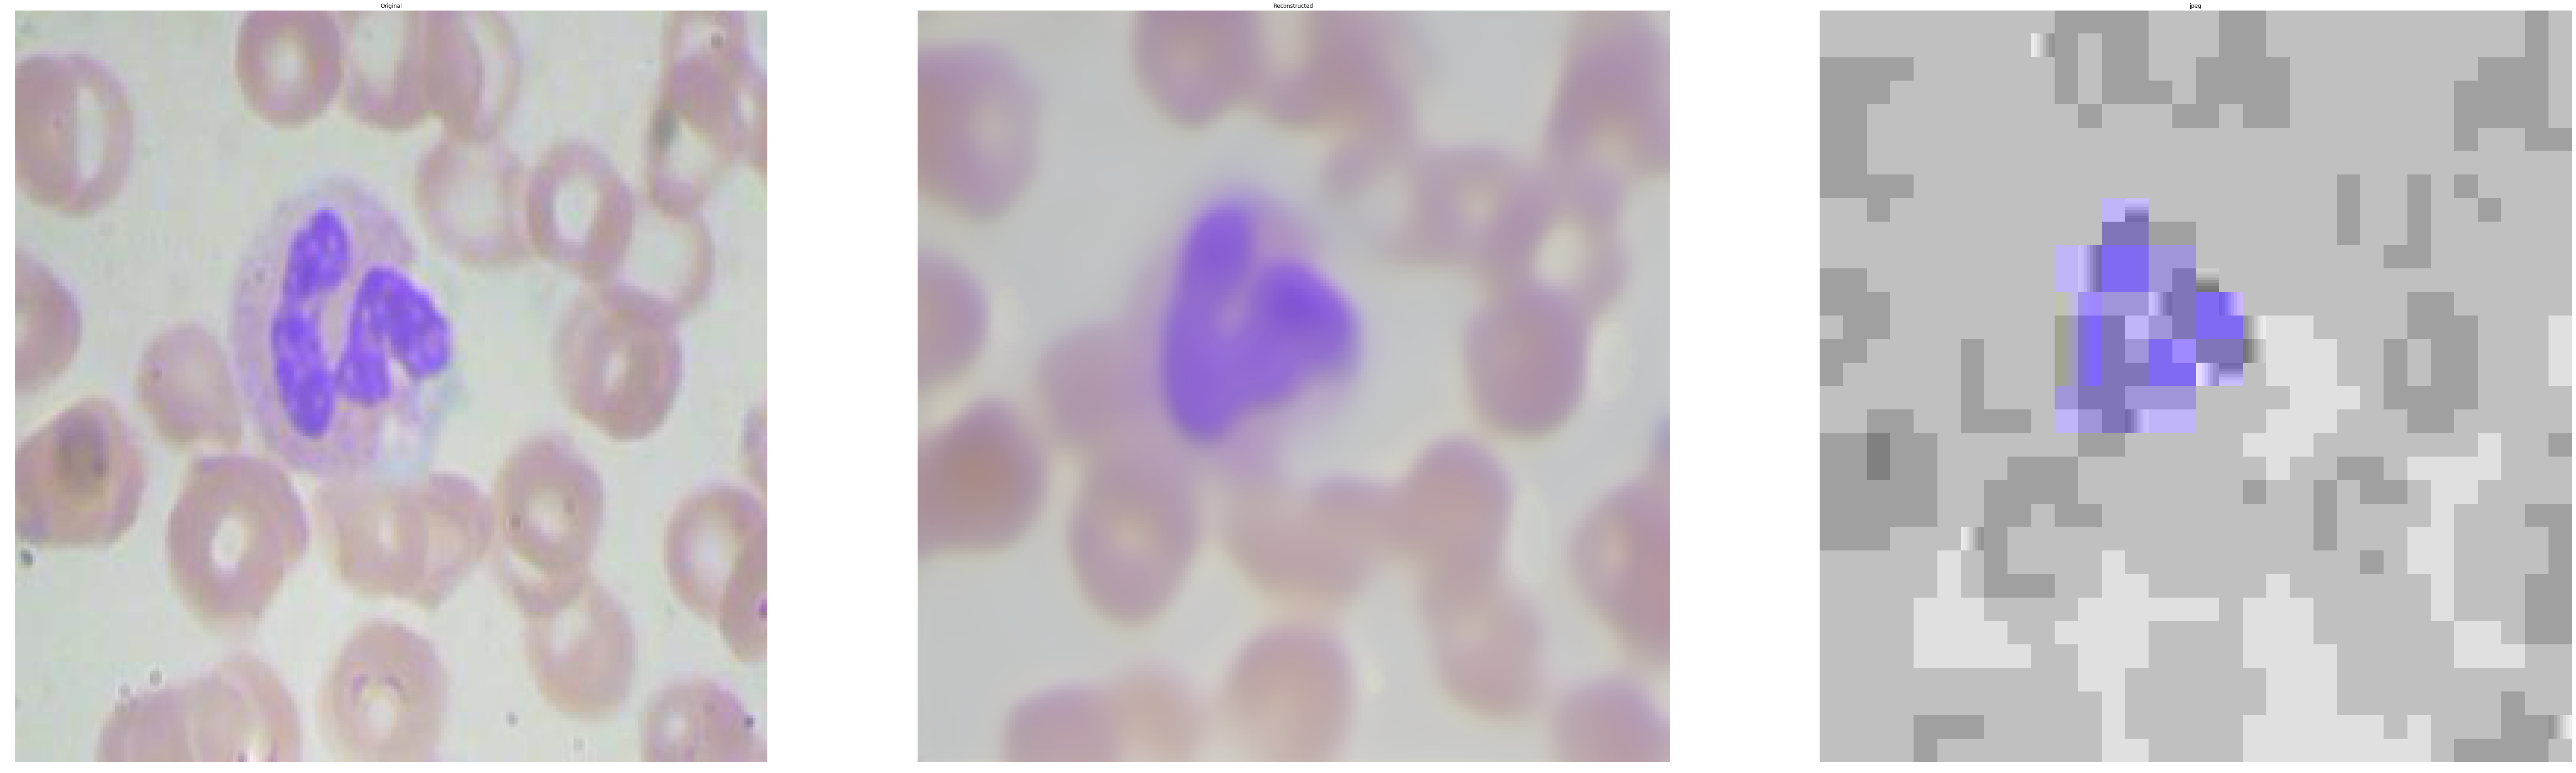

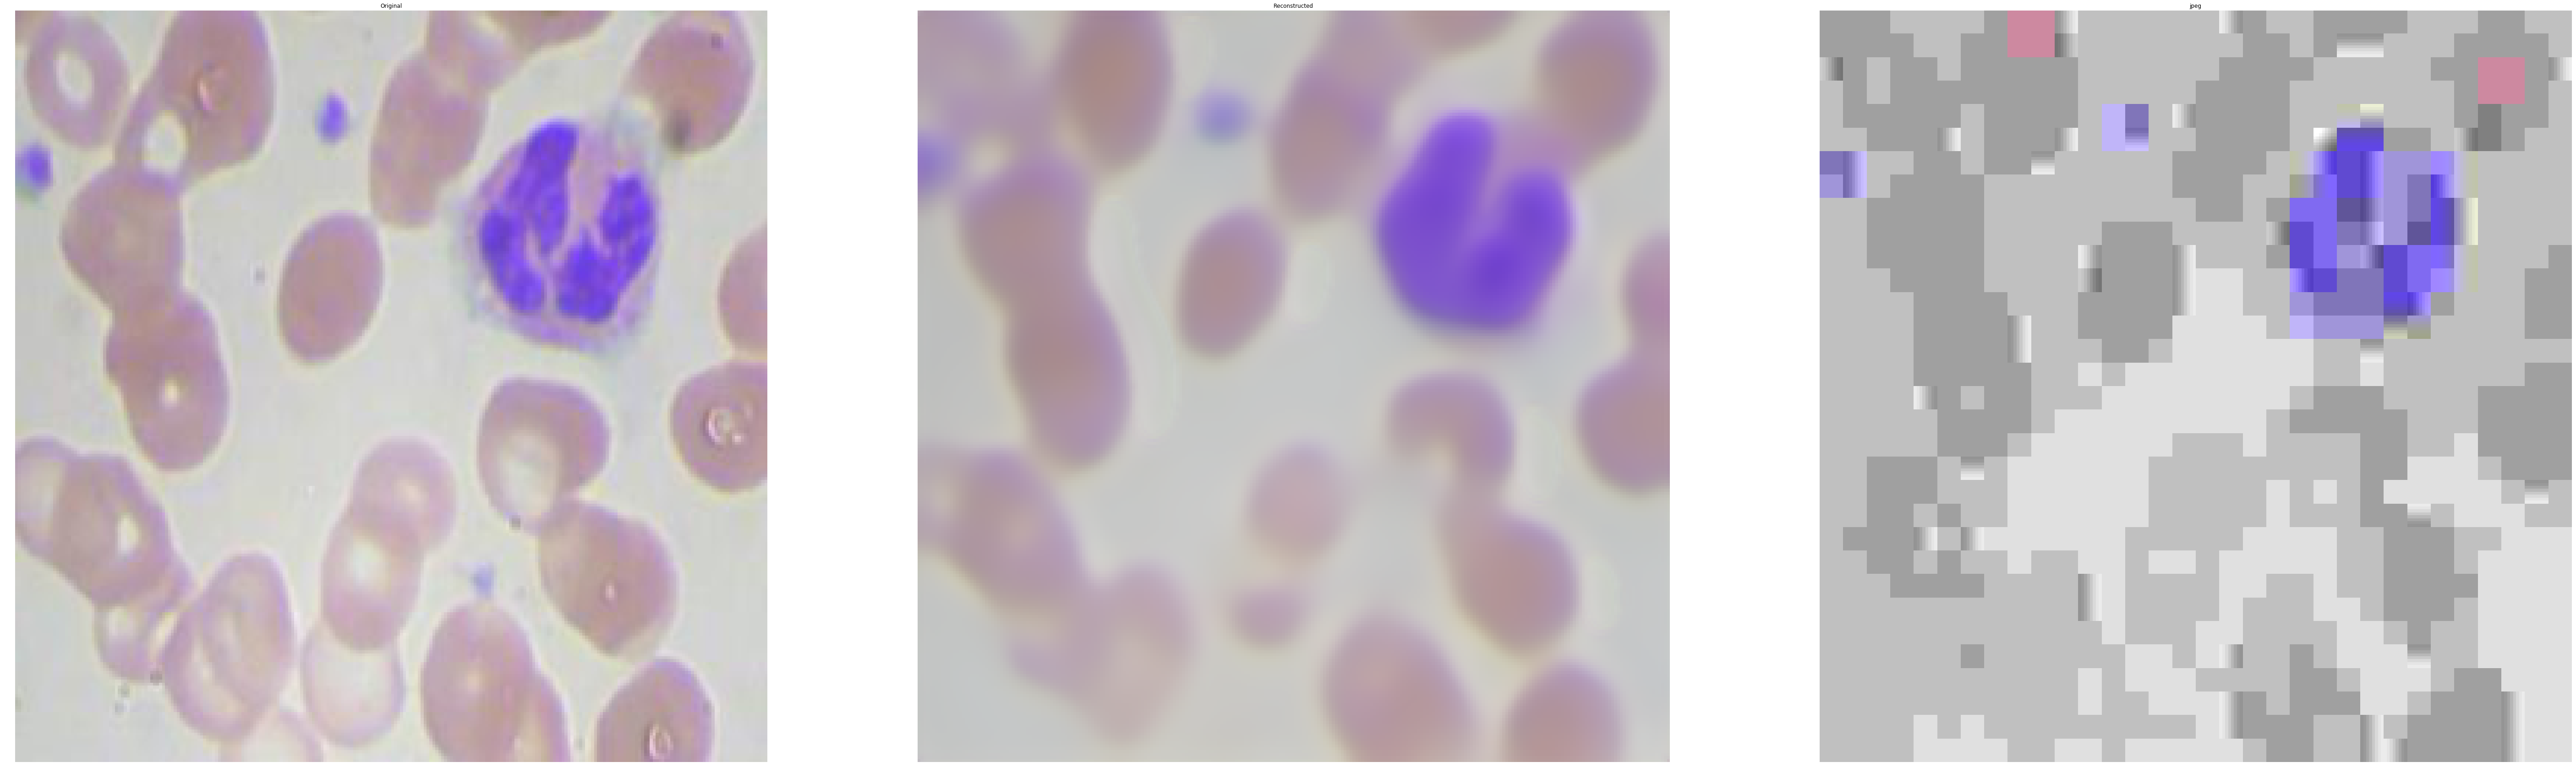

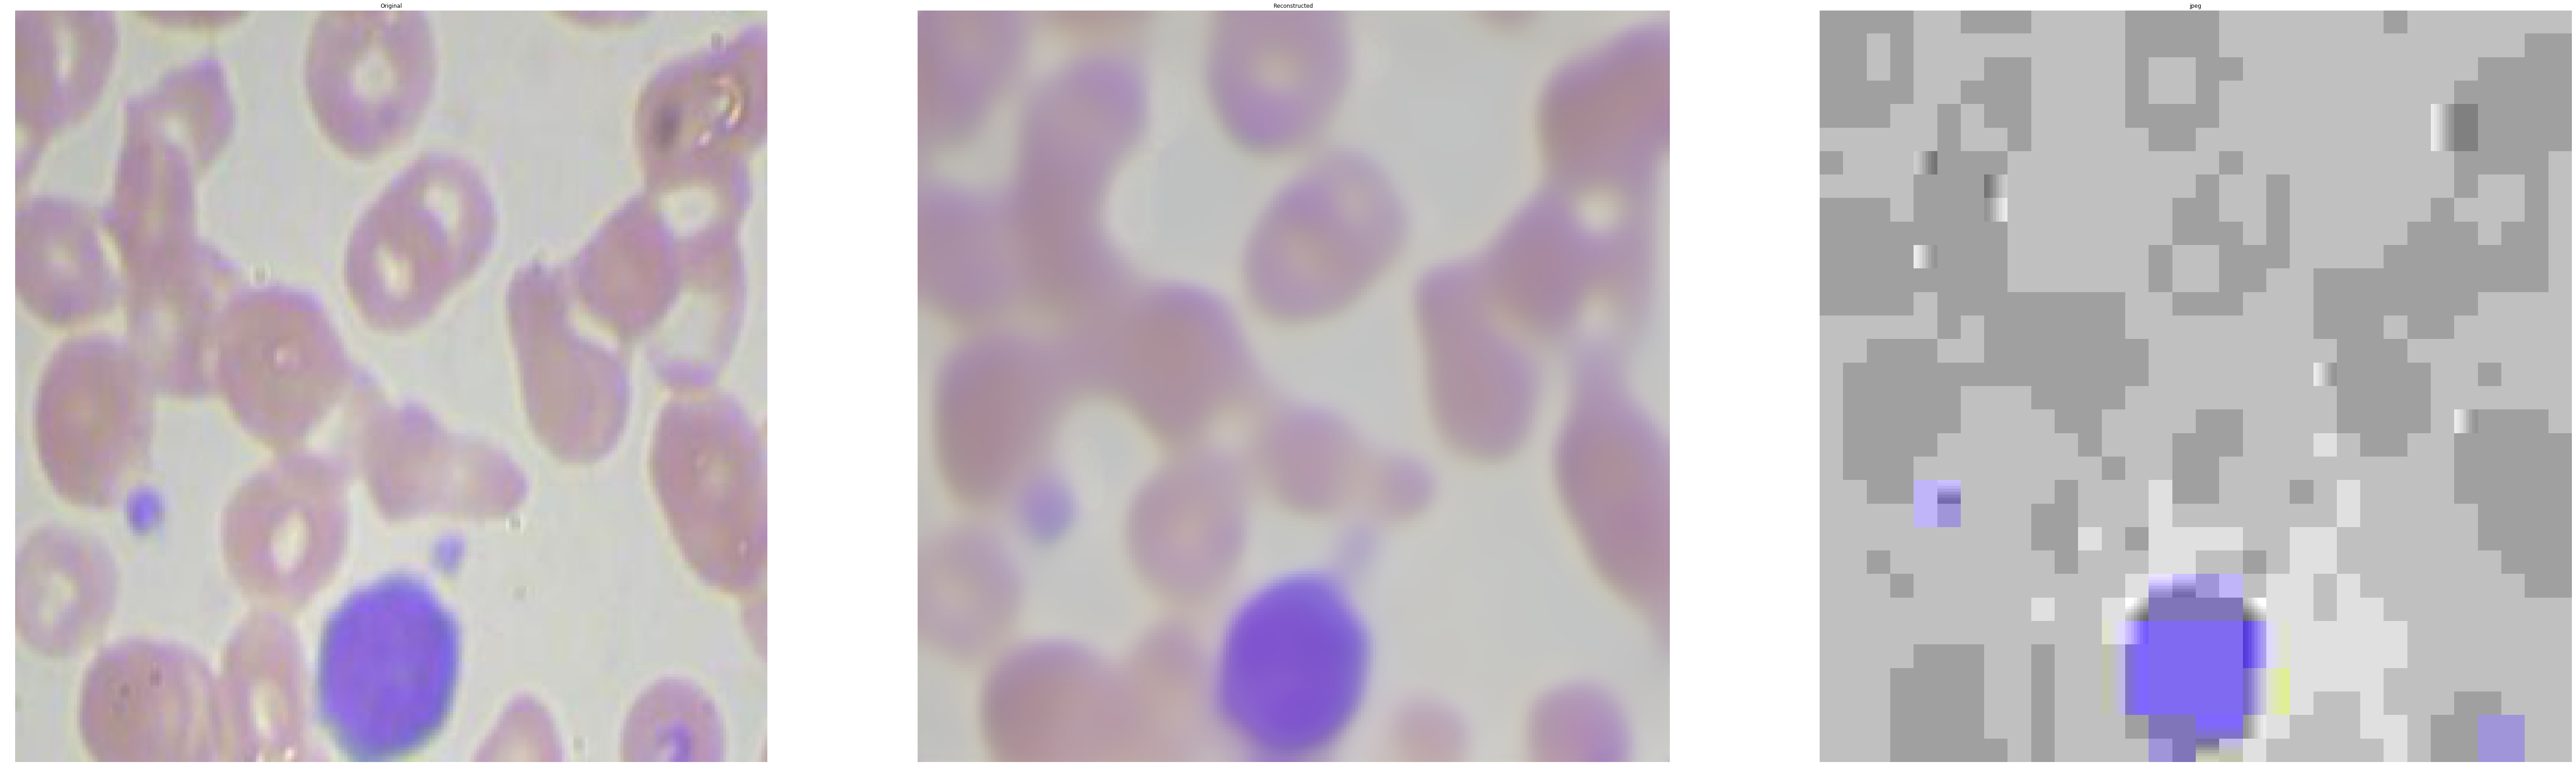

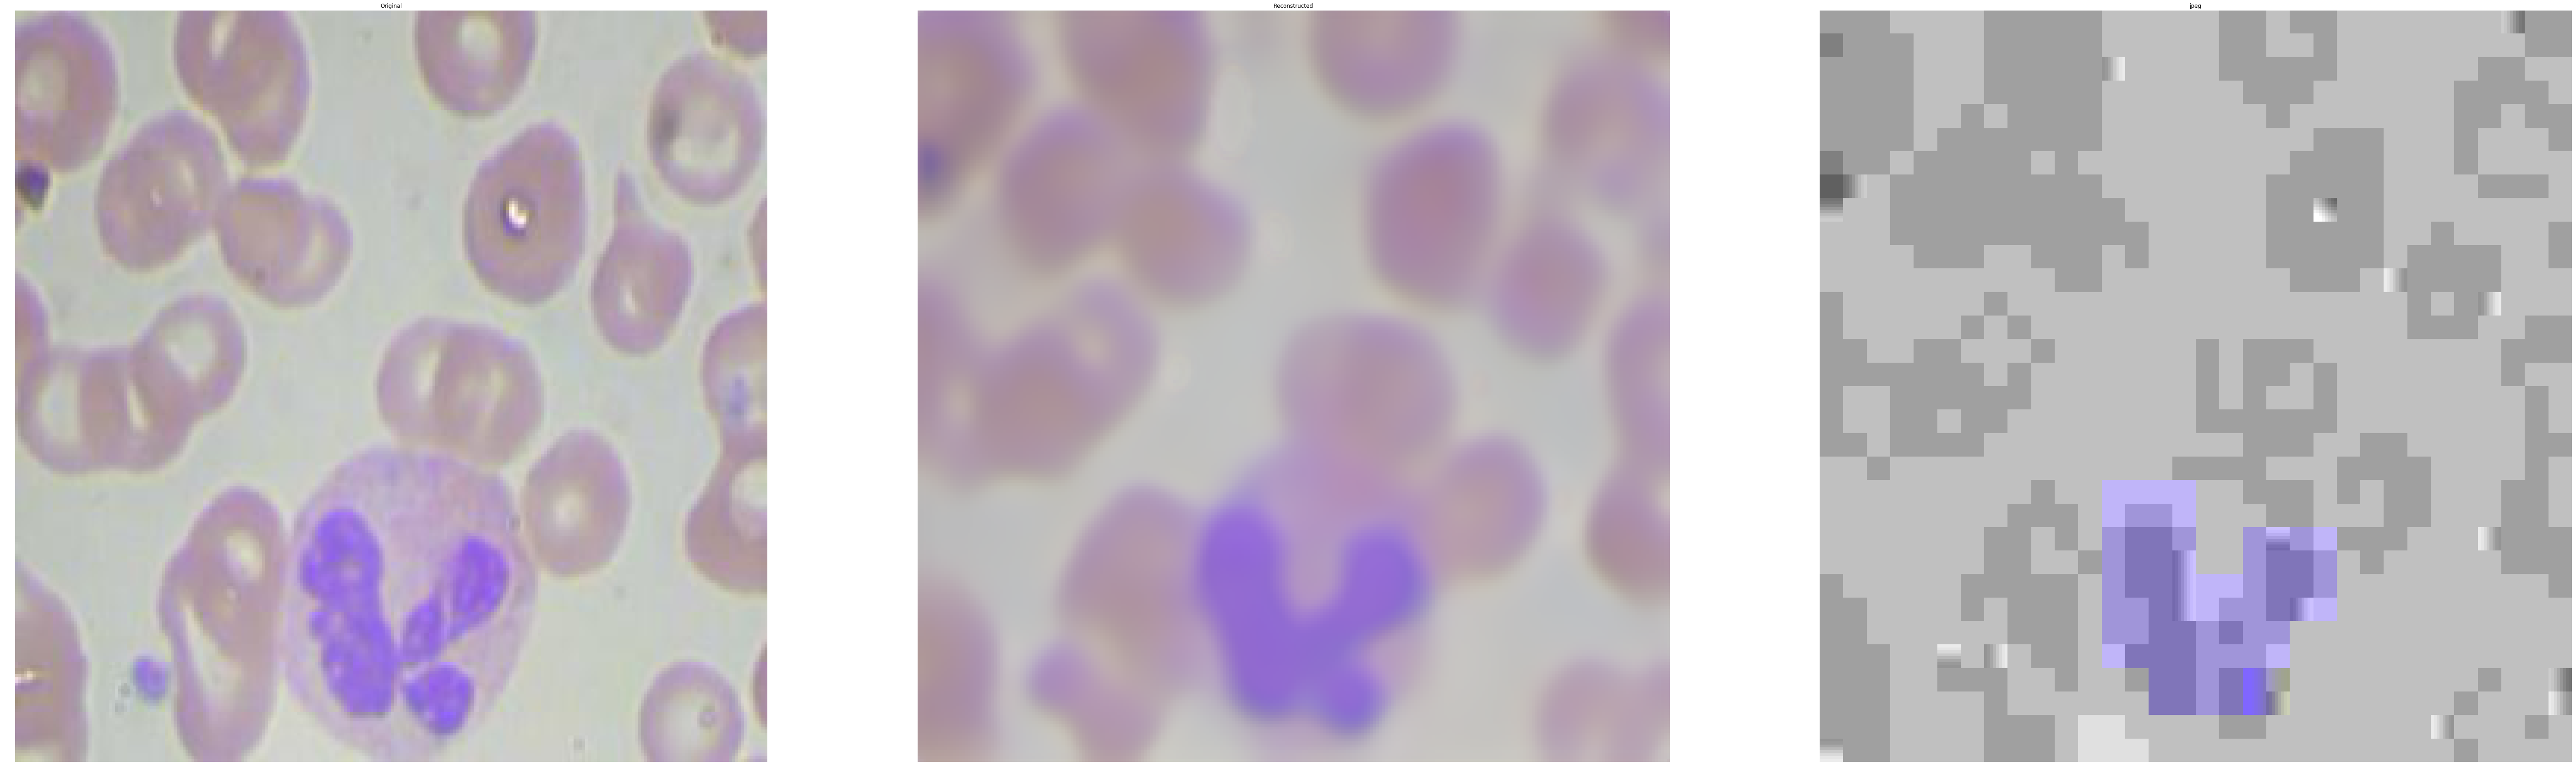

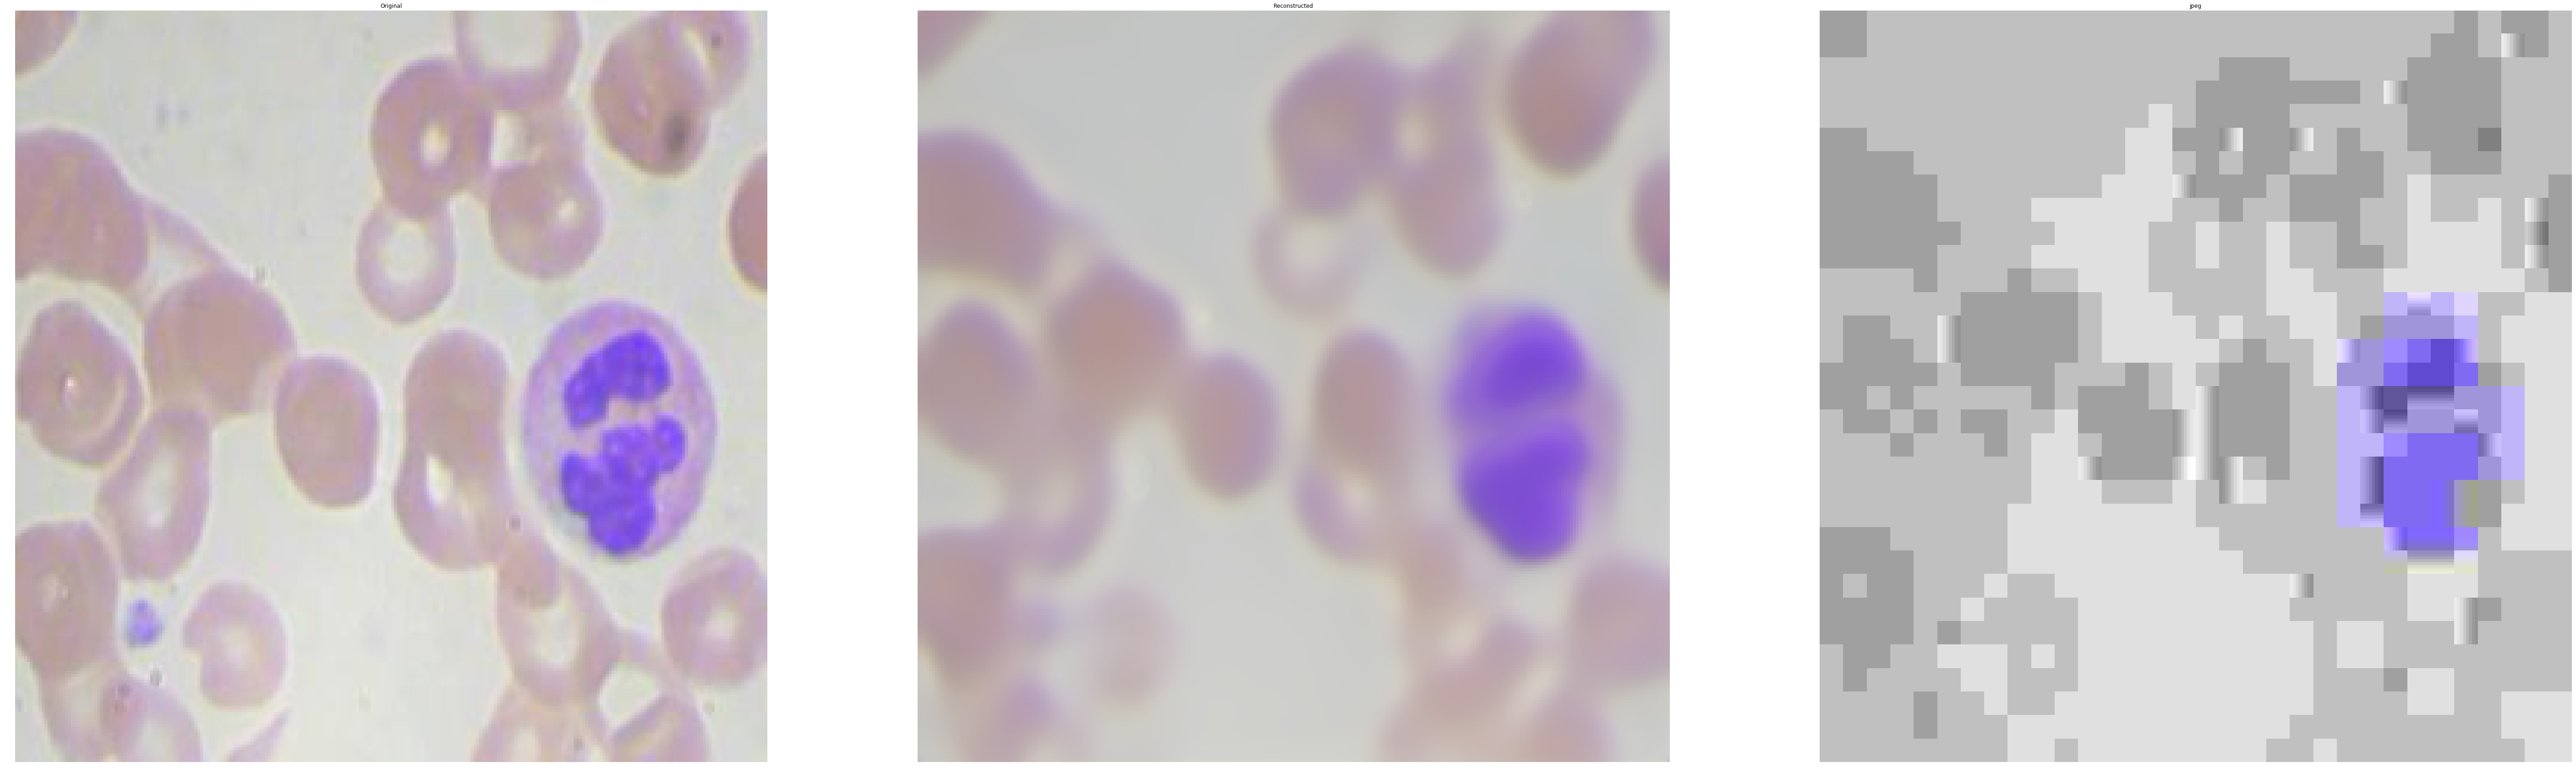

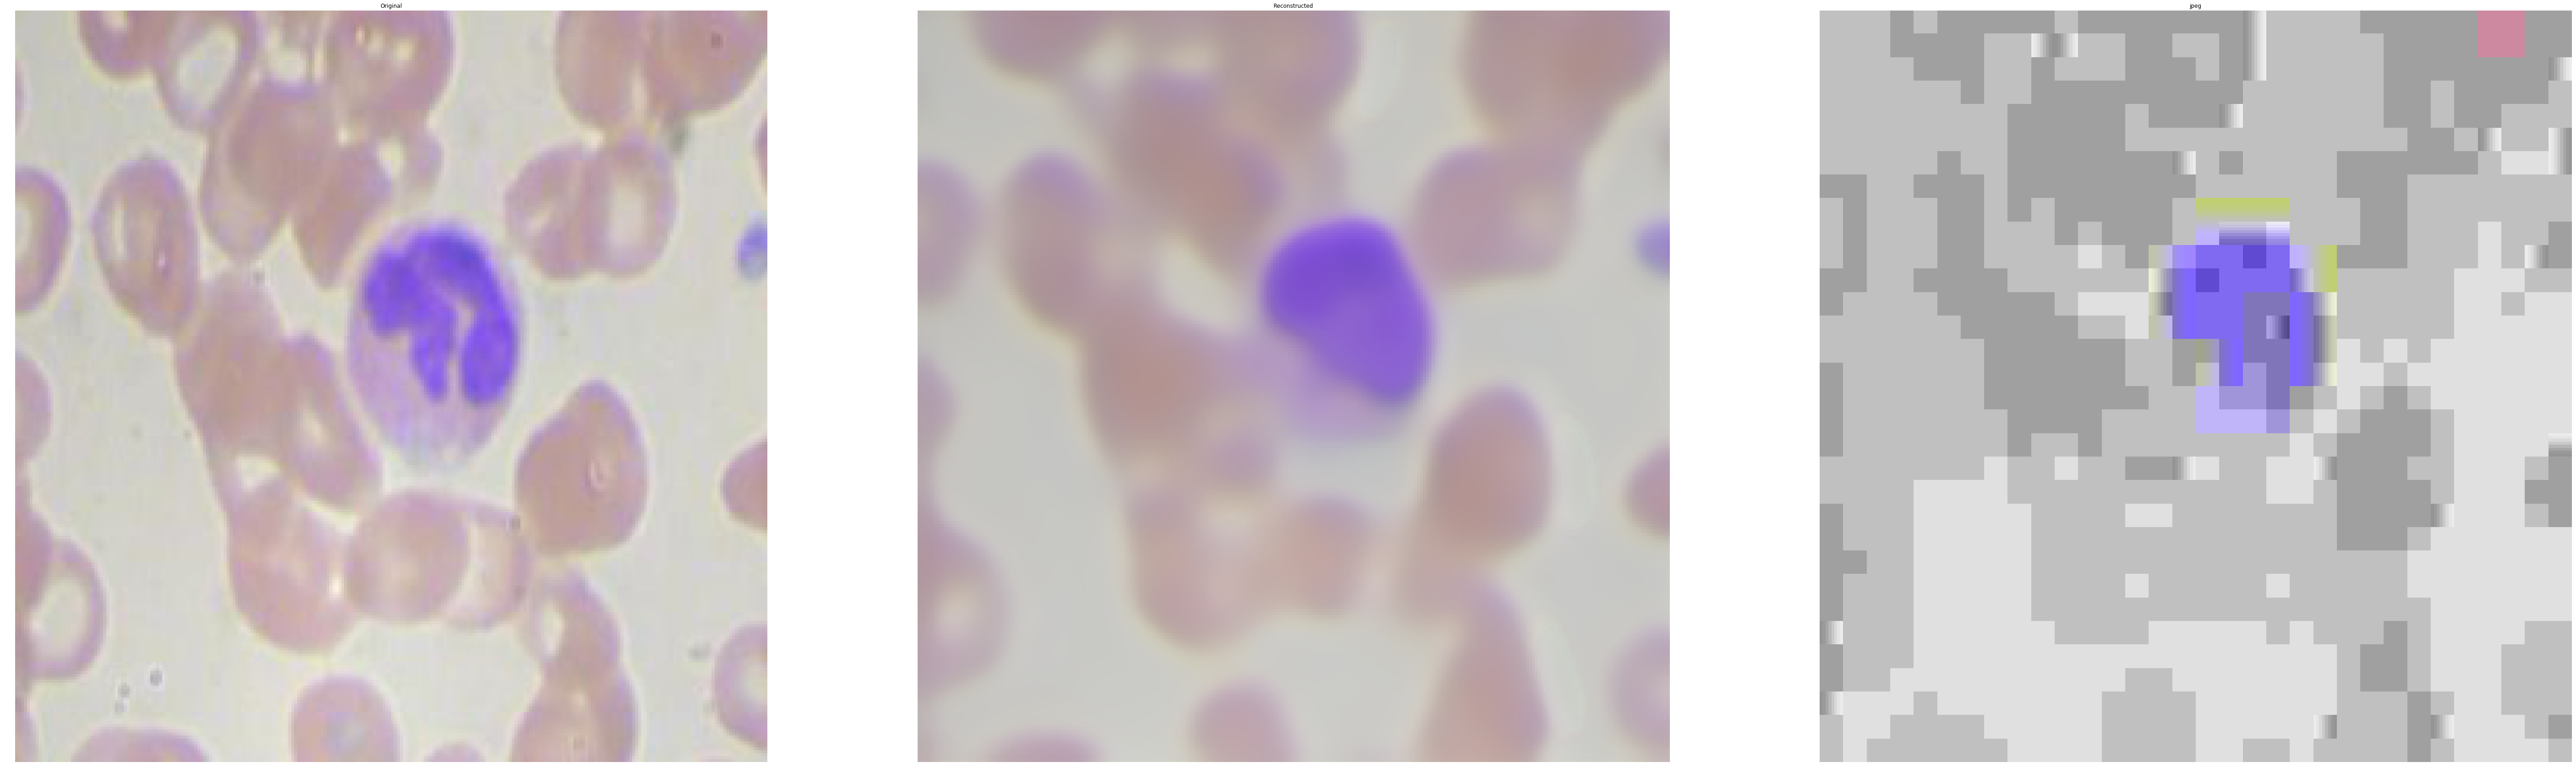

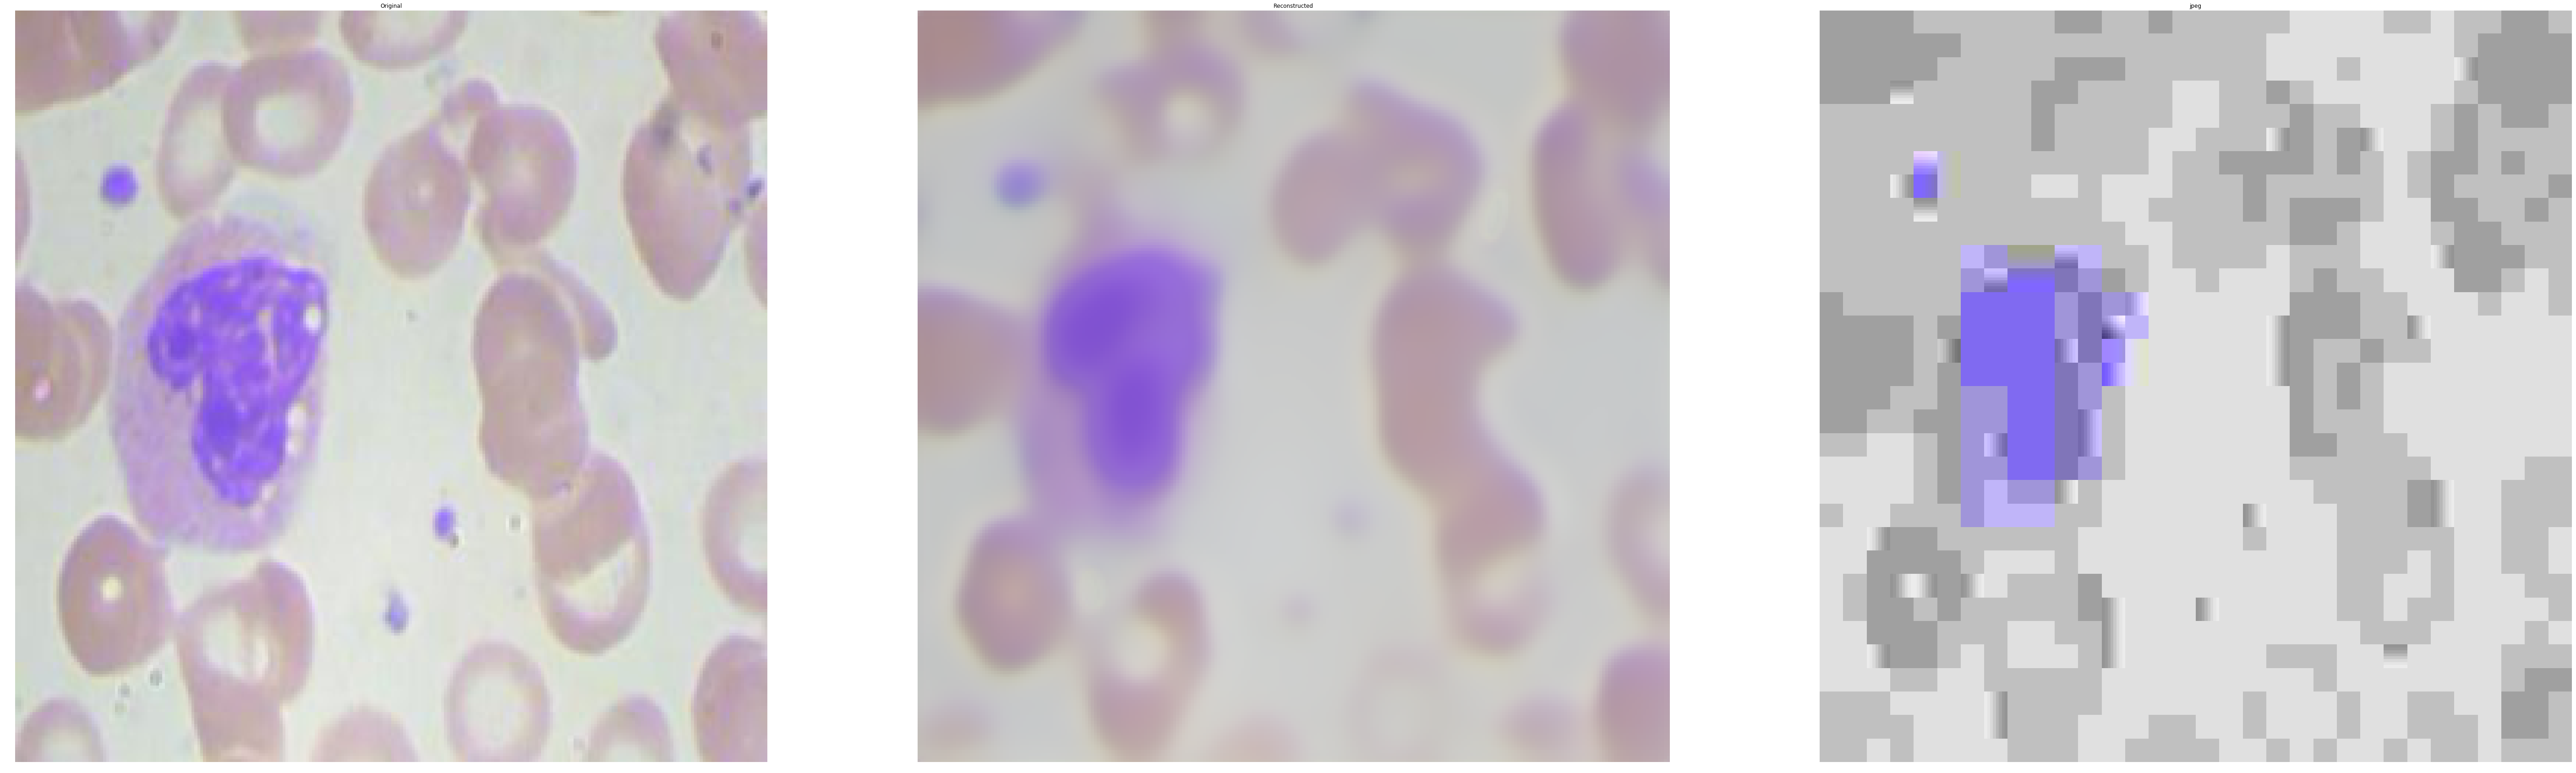

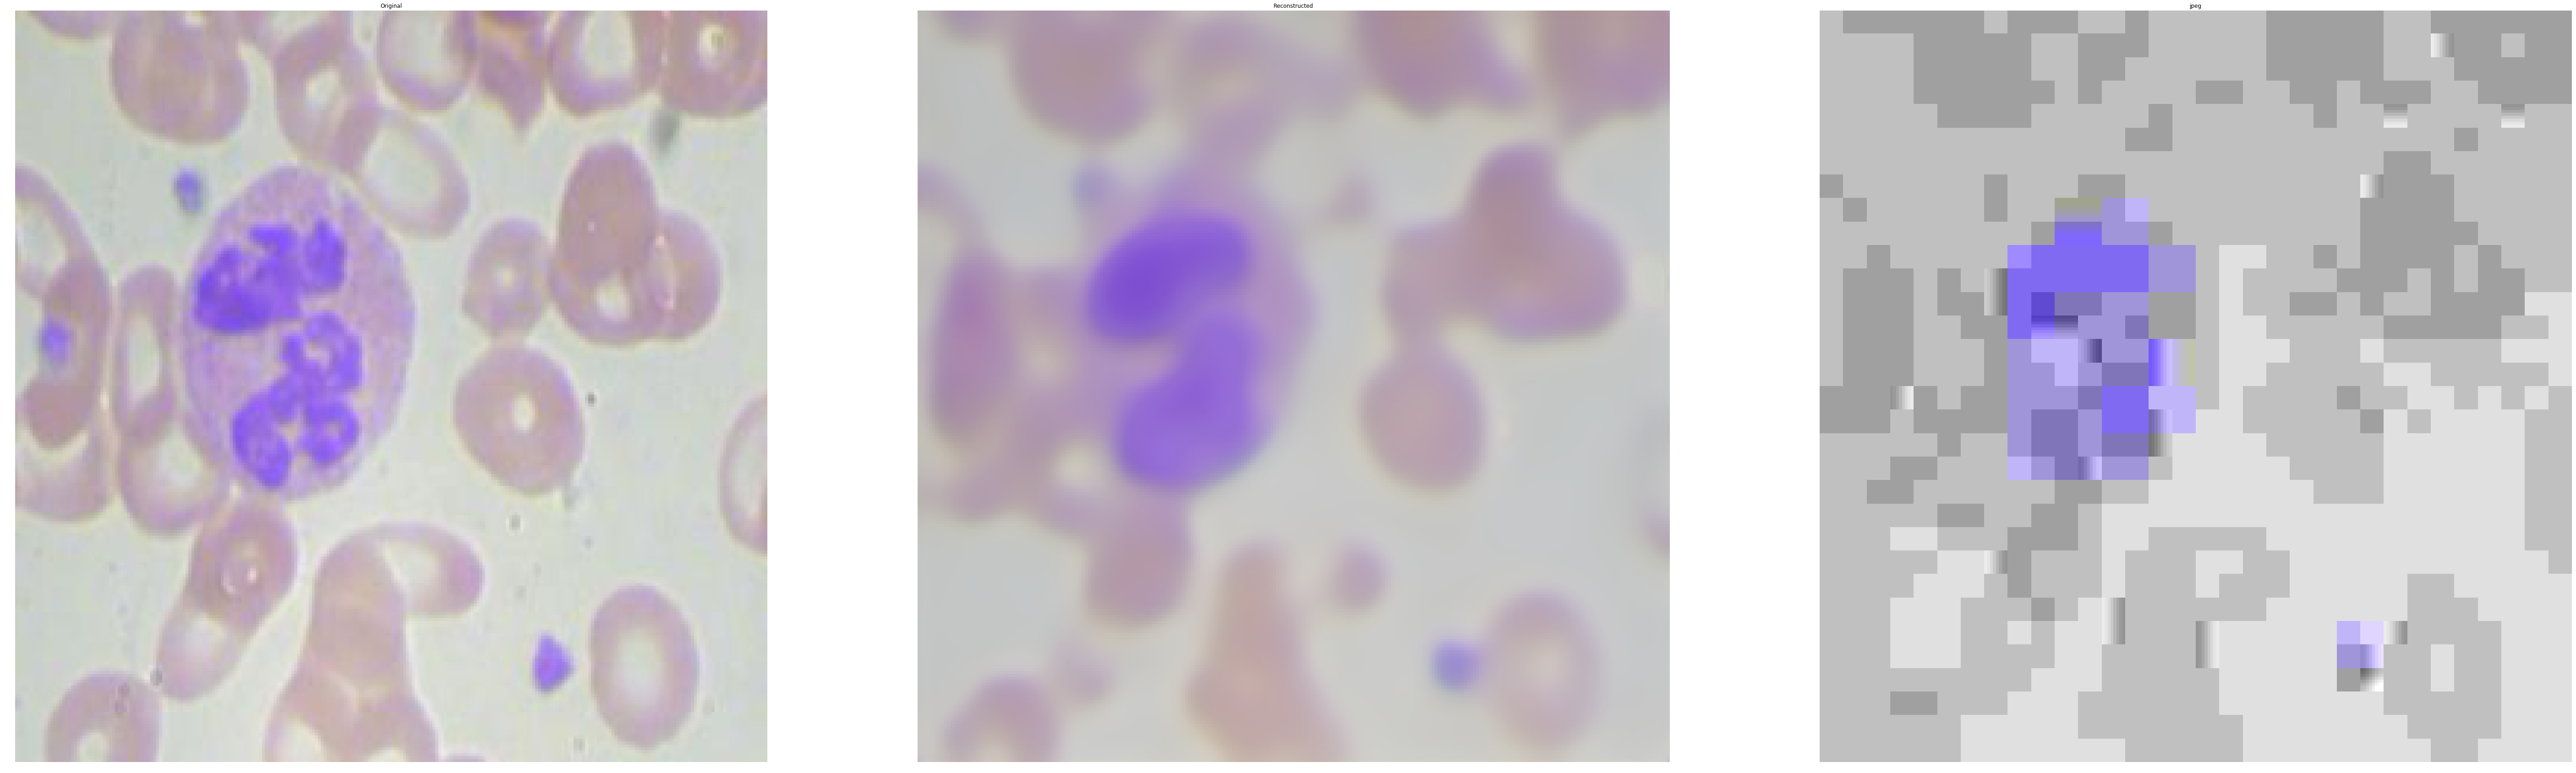

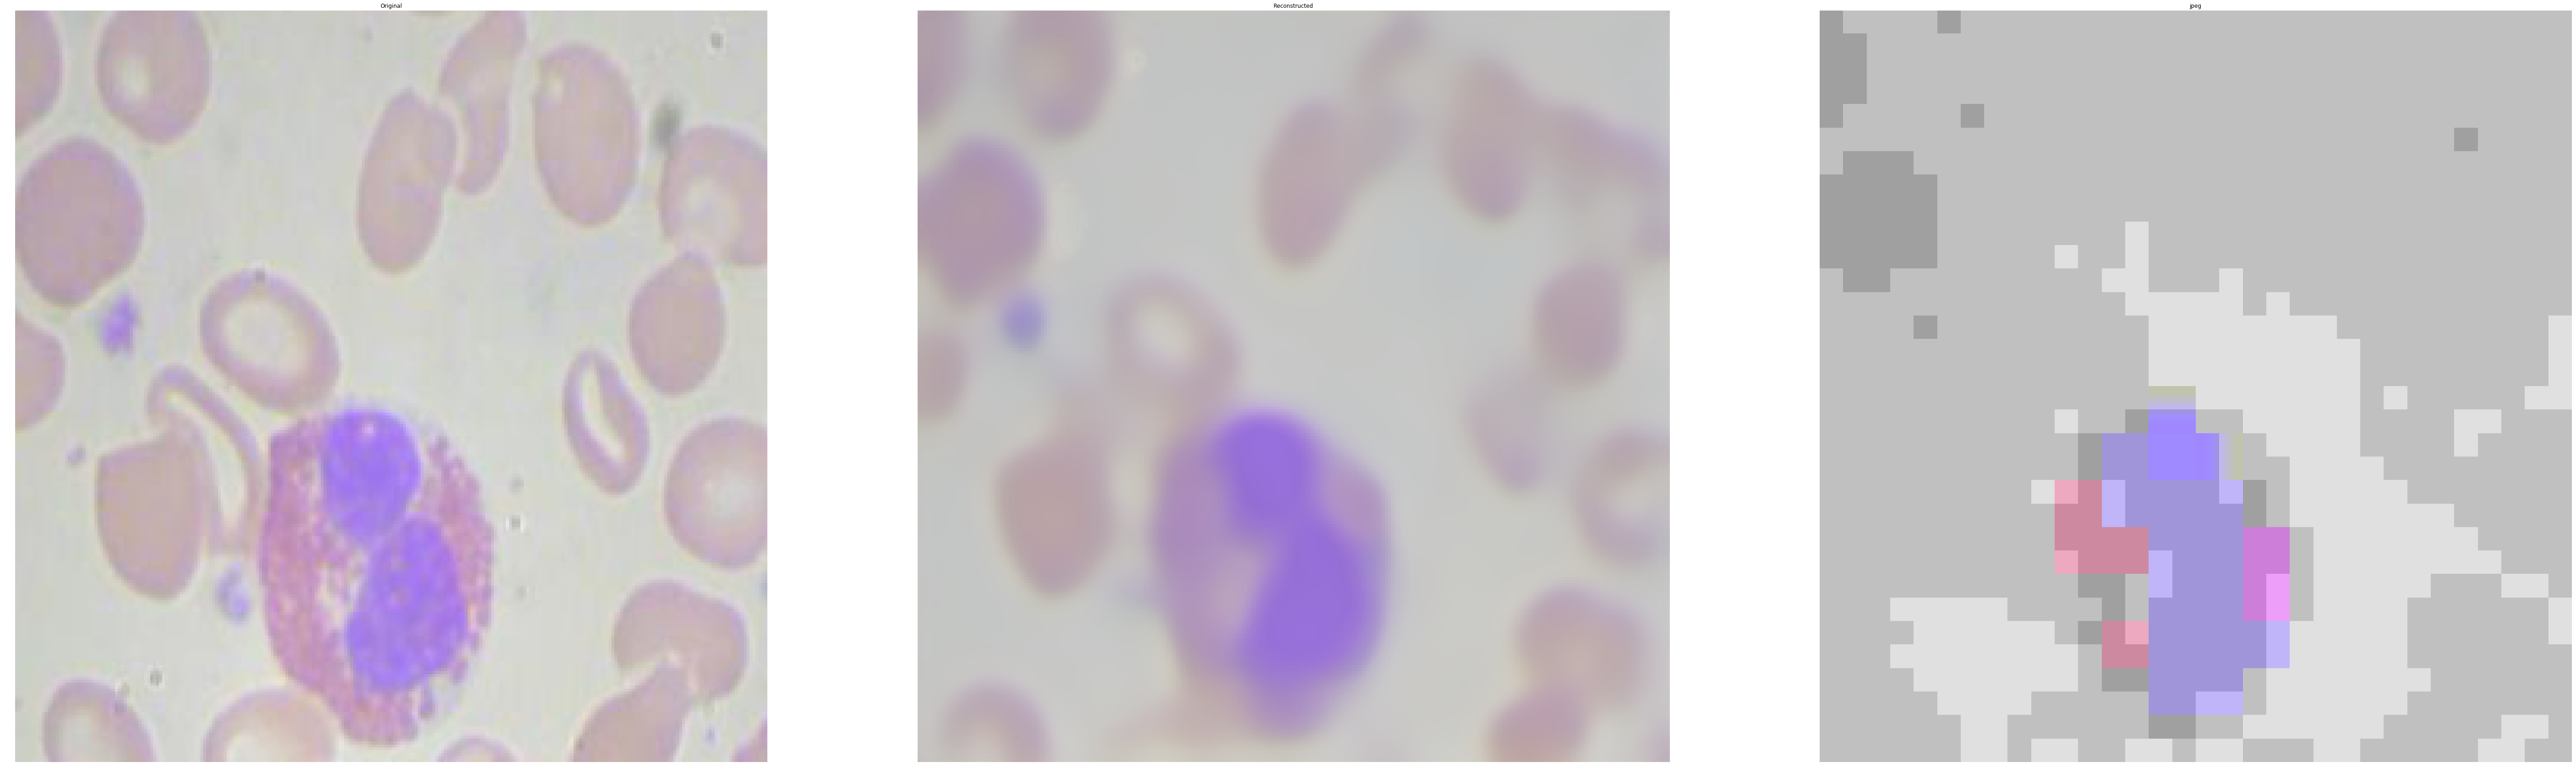

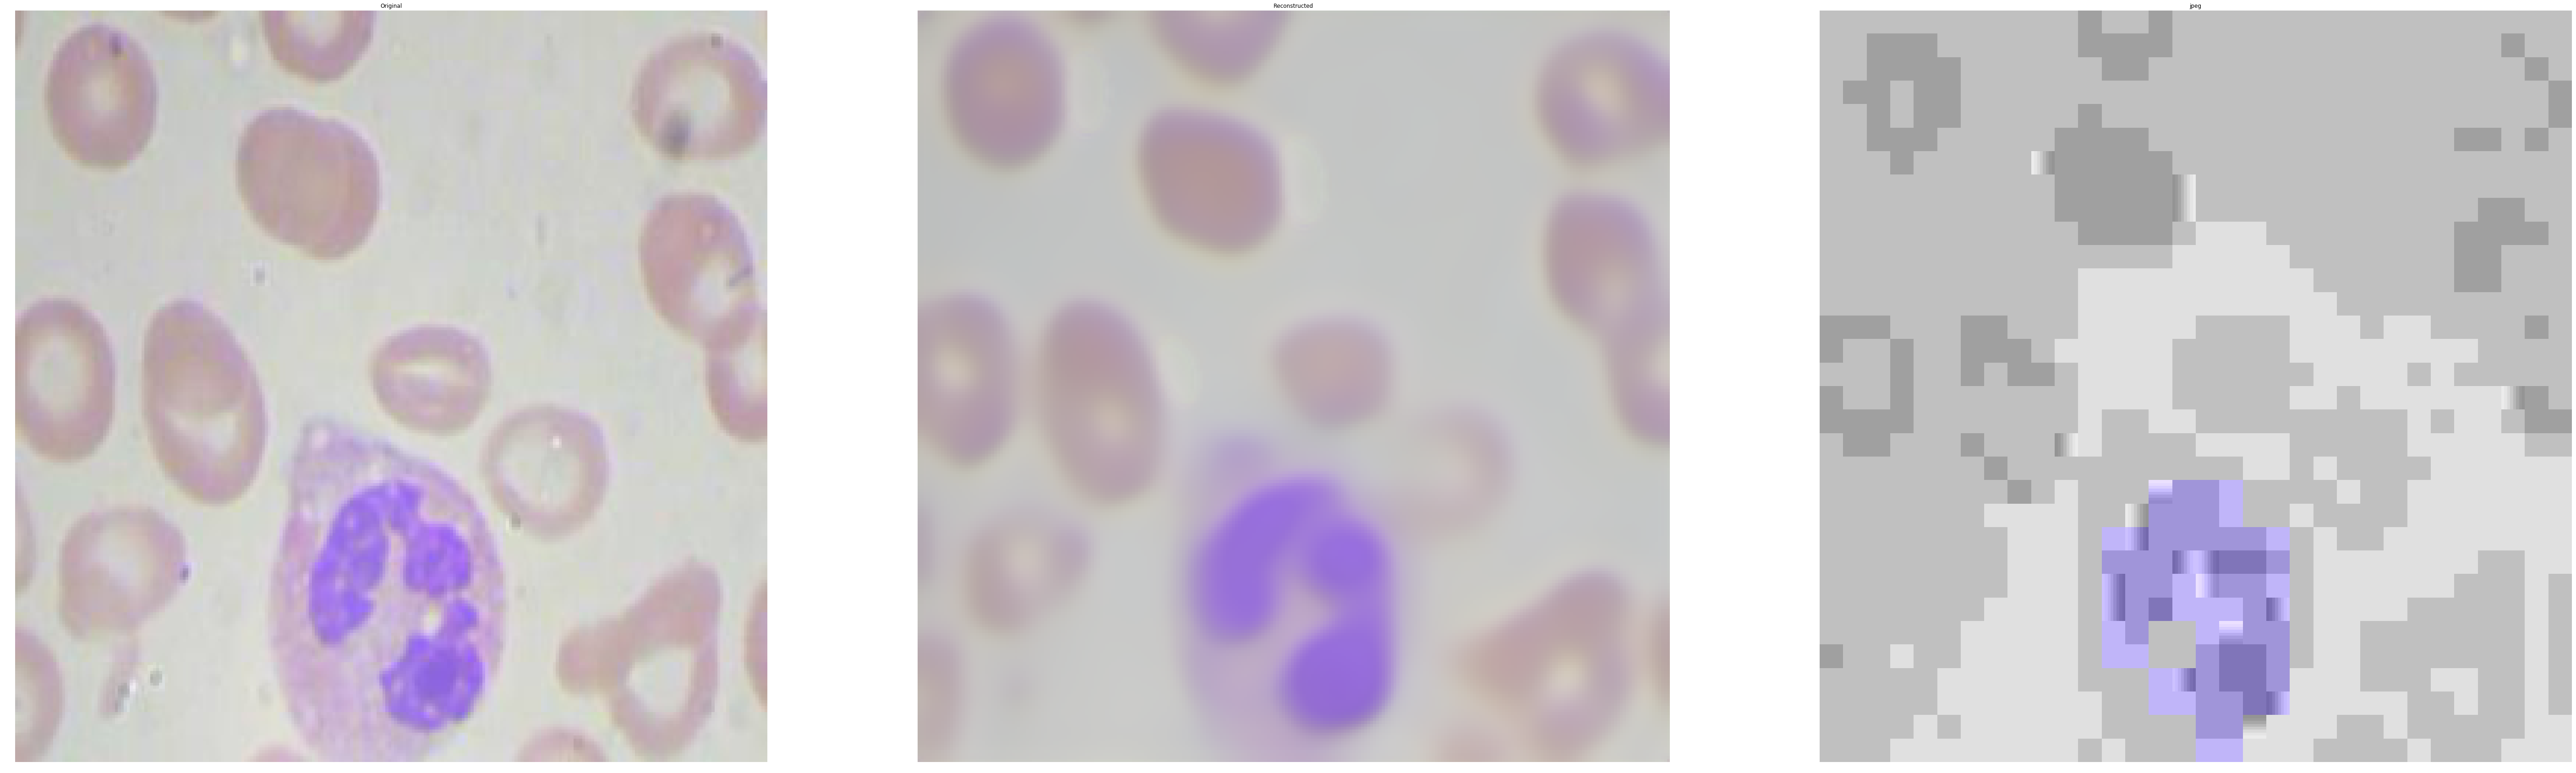

In [10]:
jpg_images = [[],[],[]]

def save_original_and_jpeg(data):
    img = data.cpu().detach()

    for i in range(img.shape[0]):
        individual_img = img[i]
        individual_img = individual_img.numpy()
        individual_img = np.transpose(individual_img, (1, 2, 0))
        jpg_images[0].append(individual_img)

        rescaled = (255.0 * individual_img)
        rescaled = rescaled.astype('uint8')
        
        PIL_img = Image.fromarray(rescaled)
        jpeg_filename = "results/blood/16/jpeg/" + str(i) + "_jaypeg.jpeg"
        PIL_img.save(jpeg_filename,"JPEG",quality=1)
     
        jpeg_compressed = Image.open(jpeg_filename)
        jpeg_compressed = np.asarray(jpeg_compressed)
        jpg_images[2].append(jpeg_compressed)

i = 0
for data in blood_cell_loader256:
        with torch.no_grad():
            if i > 0: break
            data = data.to(device)
            print(data.shape)
            save_original_and_jpeg(data)
            reconstruction = model16(data)
            save_reconstruction(reconstruction)
            i+=1
            
for i in range(10):
        plt.figure(figsize=(100,100))
        #plt.figure()
        org = jpg_images[0][i]
        plt.subplot(1, 3, 1)
        plt.axis('off')
        #imshow_noax(org, normalize=False)
        plt.imshow(org)
        plt.title('Original')
        plt.subplot(1, 3, 2)
        rec = jpg_images[1][i]
        rec.transpose((1,2,0))
        plt.imshow(rec)
        #imshow_noax(rec, normalize=False)
        plt.title('Reconstructed')
        plt.axis('off')
        image_str = net_type + "_" + original_dataset + "_" +cross_dataset+"_"+str(i) + ".png"
        plt.subplot(1, 3, 3)
        plt.axis('off')
        plt.imshow(jpg_images[2][i])
        plt.title('jpeg')
        #plt.savefig("cross_visualizations/"+image_str)
        plt.show()

In [28]:
for i in range(10):    
    org = Image.fromarray((jpg_images[0][i] * 255).astype('uint8'))
    filename = "results/blood/16/originals/" + str(i) + "_original.png"
    org.save(filename,"PNG")
    rec = Image.fromarray((jpg_images[1][i] * 255).astype('uint8'))
    filename = "results/blood/16/rec/" + str(i) + "_rec.png"
    rec.save(filename,"PNG")
    
    mserec = np.sum((jpg_images[0][i] - jpg_images[1][i])**2) / (256*256)
    psnr = -10*np.log10(mserec)
    print('image%s reconstruction PSNR: %s' % (i,psnr))
    msejpeg = np.sum((jpg_images[0][i] - jpg_images[2][i]/255.0)**2) / (256*256)
    psnr = -10*np.log10(msejpeg)
    print('image%s jpeg PSNR: %s' % (i,psnr))

image0 reconstruction PSNR: 21.701487912154484
image0 jpeg PSNR: 20.10935795008606
image1 reconstruction PSNR: 21.121848791308658
image1 jpeg PSNR: 19.04993427909534
image2 reconstruction PSNR: 22.139181822911365
image2 jpeg PSNR: 19.934303556647855
image3 reconstruction PSNR: 21.261580946951728
image3 jpeg PSNR: 20.2356207697541
image4 reconstruction PSNR: 20.73310874368248
image4 jpeg PSNR: 19.334311920079237
image5 reconstruction PSNR: 21.328079201040353
image5 jpeg PSNR: 19.0094785394497
image6 reconstruction PSNR: 20.402594228701048
image6 jpeg PSNR: 19.472501732997827
image7 reconstruction PSNR: 20.83985258695745
image7 jpeg PSNR: 19.21660034097766
image8 reconstruction PSNR: 21.913808776078486
image8 jpeg PSNR: 20.21651830397977
image9 reconstruction PSNR: 21.875881845051012
image9 jpeg PSNR: 19.856499854929833


In [ ]:
visualize('new','blood_cell','blood_cell',device,'results/blood/16/compressed/',model16.module)
images = [[],[]]